# [Deep Learning with PyTorch: A 60 Minute Blitz](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

In [2]:
%matplotlib inline
import torch
from torch.autograd import Variable
from torch import nn, optim
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import operator

## Getting Started
[Deep Learning with PyTorch: A 60 Minute Blitz](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

Tensors are similar to numpy's ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

In [3]:
x = torch.Tensor(5, 3); x


 0.0000e+00  0.0000e+00  7.6791e-43
 0.0000e+00  7.0065e-45  0.0000e+00
-9.2283e+08  6.7683e-43  0.0000e+00
 0.0000e+00  2.7552e-40  0.0000e+00
-9.4331e+08  6.7683e-43  0.0000e+00
[torch.FloatTensor of size 5x3]

In [4]:
x = torch.rand(5, 3); x


 0.7106  0.4386  0.2438
 0.9400  0.3307  0.2293
 0.2896  0.7595  0.8966
 0.9648  0.5037  0.7862
 0.7152  0.5524  0.4515
[torch.FloatTensor of size 5x3]

In [5]:
x.size()

torch.Size([5, 3])

In [6]:
y = torch.rand(5, 3)

In [7]:
x + y


 1.2537  1.3760  1.0810
 1.4671  1.2589  1.0936
 1.0902  1.4802  1.8563
 1.3850  1.3030  1.6022
 1.0148  0.7558  0.8493
[torch.FloatTensor of size 5x3]

In [8]:
torch.add(x, y)


 1.2537  1.3760  1.0810
 1.4671  1.2589  1.0936
 1.0902  1.4802  1.8563
 1.3850  1.3030  1.6022
 1.0148  0.7558  0.8493
[torch.FloatTensor of size 5x3]

In [9]:
result = torch.Tensor(5, 3) 
torch.add(x, y, out=result) # out=: preallocated memory


 1.2537  1.3760  1.0810
 1.4671  1.2589  1.0936
 1.0902  1.4802  1.8563
 1.3850  1.3030  1.6022
 1.0148  0.7558  0.8493
[torch.FloatTensor of size 5x3]

In [10]:
# anything ending in '_' is an in-place operation
y.add_(x) # adds x to y in-place


 1.2537  1.3760  1.0810
 1.4671  1.2589  1.0936
 1.0902  1.4802  1.8563
 1.3850  1.3030  1.6022
 1.0148  0.7558  0.8493
[torch.FloatTensor of size 5x3]

In [11]:
# standard numpy-like indexing with all bells and whistles
y[:,1]


 1.3760
 1.2589
 1.4802
 1.3030
 0.7558
[torch.FloatTensor of size 5]

### Numpy Bridge

The torch Tensor and numpy array will share their underlying memory locations, and changing one will change the other.

#### Converting torch Tensor to numpy Array

In [12]:
a = torch.ones(5)
a


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

In [13]:
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [14]:
a.add_(2)
print(a)
print(b)  # see how the numpy array changed in value


 3
 3
 3
 3
 3
[torch.FloatTensor of size 5]

[3. 3. 3. 3. 3.]


#### Converting numpy Array to torch Tensor

In [15]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b) # see how changing the np array changed the torch Tensor automatically

[2. 2. 2. 2. 2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



### CUDA Tensors

Tensors can be moved onto GPU using the `.cuda` function.

In [16]:
x = x.cuda()
y = y.cuda()

x+y


 1.9643  1.8146  1.3247
 2.4071  1.5896  1.3229
 1.3798  2.2397  2.7529
 2.3498  1.8067  2.3884
 1.7300  1.3082  1.3008
[torch.cuda.FloatTensor of size 5x3 (GPU 0)]

## Autograd: automatic differentiation

Central to all neural networks in PyTorch is the `autograd` package.

The `autograd` package provides automatic differentiation for all operations on Tensors.  
It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different. 

`autograd.Variable` is the central class of the package. 
It wraps a Tensor, and supports nearly all of operations defined on it. Once you finish your computation you can call `.backward()` and have all the gradients computed automatically.

You can access the raw tensor through the `.data` attribute, while the gradient w.r.t. this variable is accumulated into `.grad`.

If you want to compute the derivatives, you can call `.backward()` on a `Variable`. 

In [17]:
x = Variable(torch.ones(2,2), requires_grad=True); x

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [18]:
y = x + 2; y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

y was created as a result of an operation, so it has a `grad_fn`.

In [19]:
y.grad_fn #y.creator 

In [20]:
z = y * y * 3; z

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]

In [21]:
out = z.mean(); out

Variable containing:
 27
[torch.FloatTensor of size 1]

let’s backprop now `out.backward()` is equivalent to doing `out.backward(torch.Tensor([1.0]))`

In [22]:
out.backward()

print gradients d(out)/dx

In [23]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



You should have got a matrix of `4.5`.
You should have got a matrix of 4.5. Let’s call the out Variable “o”. We have that $$o=\frac{1}{4}\sum_{i}z_{i}$$, 
$$z_{i}=3(x_{i}+2)^2$$ and  $$z_{i}∣_{x_{i=1}}=27$$. Therefore, $$\frac{∂o}{∂x_{i}}=\frac{3}{2}(x_{i}+2)$$, hence $$\frac{∂o}{∂x_{i}}∣_{x_{i}=1}=\frac{9}{2}=4.5.$$

Because PyTorch is a dynamic computation framework, we can take the gradients of all kinds of interesting computations, even loops!

In [24]:
x = torch.randn(3)
x = Variable(x, requires_grad = True)

In [25]:
y = x * 2
while y.data.norm() < 1000:
    y = y * 2

In [26]:
y

Variable containing:
-1092.4250
  166.4847
  490.9778
[torch.FloatTensor of size 3]

In [27]:
gradients = torch.FloatTensor([0.1, 1, 1000])
y.backward(gradients)

In [28]:
x.grad

Variable containing:
1.00000e+06 *
  0.0001
  0.0010
  1.0240
[torch.FloatTensor of size 3]

## Neural Networks

Neural networks can be constructed using the `torch.nn` package.

An `nn.Module` contains layers, and a method `forward(input)`that returns the `output`.

In [29]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [30]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) # 1 input channel, 6 output channels, 5x5 kernel
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # like keras' Dense()
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x)) # .view is like .reshape()
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        #return reduce(operator.mul, x.size()[1:])
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size: num_features*=s
        return num_features

In [31]:
net = Net()
print(net)

Net(
  (conv1): Conv2d (1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


You just have to define the `forward` function, and the `backward` function (where gradients are computed) is automatically defined for you using `autograd`.
You can use any of the Tensor operations in the `forward` function.
The learnable parameters of a model are returned by `net.parameters()`

In [32]:
net = net.cuda()
net

Net(
  (conv1): Conv2d (1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)

In [33]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


The input to the forward is a `autograd.Variable`, and so is the output.
 Note: Expected input size to this net(LeNet) is 32x32. To use this net on MNIST dataset,please resize the images from the dataset to 32x32.

In [34]:
input = Variable(torch.randn(1, 1, 32, 32)).cuda()
out = net(input); out

Variable containing:
-0.0898 -0.0552  0.1167 -0.0665  0.0742 -0.0757  0.0607  0.0202 -0.0684 -0.0163
[torch.cuda.FloatTensor of size 1x10 (GPU 0)]

In [35]:
net.zero_grad() # zeroes (free) the gradient buffers of all parameters 
out.backward(torch.randn(1, 10).cuda()) # backprops with random gradients

In [36]:
out

Variable containing:
-0.0898 -0.0552  0.1167 -0.0665  0.0742 -0.0757  0.0607  0.0202 -0.0684 -0.0163
[torch.cuda.FloatTensor of size 1x10 (GPU 0)]

A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target. There are [several different loss functions under the nn package](http://pytorch.org/docs/nn.html#loss-functions). A simple loss is: `nn.MSELoss` which computes the mean-squared error between the input and the target.

In [37]:
output = net(input)
target = Variable(torch.arange(1, 11)).cuda() # a dummy target, for example
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

Variable containing:
 38.5830
[torch.cuda.FloatTensor of size 1 (GPU 0)]



Now, if you follow `loss` in the backward direction, using it's `.creator` attribute, you will see a graph of computations that looks like this:

```
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d  
      -> view -> linear -> relu -> linear -> relu -> linear 
      -> MSELoss
      -> loss
```

So, when we call `loss.backward()`, the whole graph is differentiated w.r.t. the loss, and all Variables in the graph will have their `.grad` Variable accumulated with the gradient.

For illustration, let us follow a few steps backward:

In [39]:
print(loss.grad_fn) # MSELoss
print(loss.grad_fn.next_functions[0][0]) # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # ReLU

### Backprop

To backpropagate the error all we have to do is to `loss.backward()`. You need to clear the existing gradients though, else gradients will be accumulated to existing gradients

Now we shall call `loss.backward()`, and have a look at conv1’s bias gradients before and after the backward.

In [40]:
# now we shall call loss.backward(), and have a look at gradients before and after
net.zero_grad() # zeroes the gradient buffers of all parameters
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.cuda.FloatTensor of size 6 (GPU 0)]

conv1.bias.grad after backward
Variable containing:
 0.0625
 0.0926
 0.0822
-0.1745
-0.2623
-0.1187
[torch.cuda.FloatTensor of size 6 (GPU 0)]



Read Later:

    The neural network package contains various modules and loss functions that form the building blocks of deep neural networks. A full list with documentation is
[here](http://pytorch.org/docs/nn)

### Update the weights

The simplest update rule used in practice is the Stochastic Gradient Descent (SGD):

    weight = weight - learning_rate * gradient

We can implement this using simple python code:

In [41]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

However, as you use neural networks, you want to use various different update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc. To enable this, we built a small package: torch.optim that implements all these methods. Using it is very simple:

In [43]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()  # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()  # Does the update

## Training a classifier
This is it. You have seen how to define neural networks, compute loss and make updates to the weights of the network.

Now you might be thinking,

### What about data?

Generally, when you have to deal with image, text, audio or video data, you can use standard python packages that load data into a numpy array. Then you can convert this array into a `torch.*Tensor`.

    For images, packages such as Pillow, OpenCV are useful.
    For audio, packages such as scipy and librosa
    For text, either raw Python or Cython based loading, or NLTK and SpaCy are useful.

Specifically for `vision`, we have created a package called `torchvision`, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., `torchvision.datasets` and `torch.utils.data.DataLoader`.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

## Training an image classifier

We will do the following steps in order:

1. **Load and normalizing the CIFAR10 training and test datasets using torchvision**
2. **Define a Convolution Neural Network**
3. **Define a loss function and optimizer**
4. **Train the network on the training data**
5. **Test the network on the test data**


### 1. Loading and normalizing CIFAR10

Using `torchvision`, it’s extremely easy to load CIFAR10.

In [82]:
import torch
import torchvision
import torchvision.transforms as transforms

In [91]:
# The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                       download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                      download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [92]:
import matplotlib.pyplot as plt
import numpy as np

In [93]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # turn from channel-first to channel-last

  cat horse  frog   dog


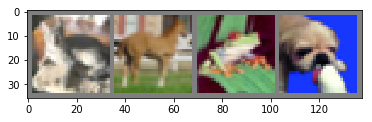

In [94]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(len(labels))))

### 2. Define a Convolution Neural Network
Copy the neural network from the Neural Networks section before and modify it to take 3-channel images (instead of 1-channel images as it was defined).

In [95]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [96]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 3 input channel, 6 output channels, 5x5 kernel
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # like keras' Dense()
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5) # .view is like .reshape()
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    '''
    def num_flat_features(self, x):
        #return reduce(operator.mul, x.size()[1:])
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size: num_features*=s
        return num_features
    '''

In [97]:
net = Net()
print(net)

Net(
  (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


### 3. Define a Loss function and optimizer
Let’s use a Classification Cross-Entropy loss and SGD with momentum

In [98]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4. Train the network

This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize

In [100]:
for epoch in range(2):   # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:   # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.215
[1,  4000] loss: 1.205
[1,  6000] loss: 1.204
[1,  8000] loss: 1.179
[1, 10000] loss: 1.198
[1, 12000] loss: 1.165
[2,  2000] loss: 1.091
[2,  4000] loss: 1.100
[2,  6000] loss: 1.103
[2,  8000] loss: 1.085
[2, 10000] loss: 1.115
[2, 12000] loss: 1.091
Finished Training


## 5. Test the network on the test data

We have trained the network for 2 passes over the training dataset. But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

Ground Truth:    cat  ship  ship plane


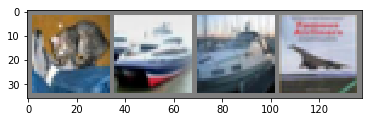

In [101]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('Ground Truth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:

In [102]:
outputs = net(Variable(images))

The outputs are energies for the 10 classes. Higher the energy for a class, the more the network thinks that the image is of the particular class. So, let’s get the index of the highest energy:

In [117]:
_, predicted = torch.max(outputs.data, 1)
print('Predicted: ', ' '.join('%.5s' % classes[predicted[j]] for j in range(4)))

Predicted:  cat ship ship ship


The results seem pretty good.

Let us look at how the network performs on the whole dataset.

In [119]:
correct = 0
total = 0 
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' %
     (100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


That looks waaay better than chance, which is 10% accuracy (randomly picking a class out of 10 classes). Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did not perform well:

In [122]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_total[label] += 1
        class_correct[label] += c[i]
        
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 67 %
Accuracy of   car : 78 %
Accuracy of  bird : 46 %
Accuracy of   cat : 40 %
Accuracy of  deer : 70 %
Accuracy of   dog : 30 %
Accuracy of  frog : 69 %
Accuracy of horse : 62 %
Accuracy of  ship : 76 %
Accuracy of truck : 68 %


Okay, so what next?

How do we run these neural networks on the GPU?

### Training on GPU

Just like how you transfer a Tensor on to the GPU, you transfer the neural net onto the GPU. This will recursively go over all modules and convert their parameters and buffers to CUDA tensors:

`net.cuda()`

Remember that you will have to send the inputs and targets at every step to the GPU too:

`inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())`

Why dont I notice MASSIVE speedup compared to CPU? Because your network is realllly small.



**Exercise: Try increasing the width of your network (argument 2 of the first nn.Conv2d, and argument 1 of the second nn.Conv2d – they need to be the same number), see what kind of speedup you get.**

## Optional: Data Parallelism

In this tutorial, we will learn how to use multiple GPUs using `DataParallel`.

It’s very easy to use GPUs with PyTorch. You can put the model on a GPU:

`model.gpu()`

Then, you can copy all your tensors to the GPU:

`mytensor = my_tensor.gpu()`

**Please note that just calling mytensor.gpu() won’t copy the tensor to the GPU. You need to assign it to a new tensor and use that tensor on the GPU.**

It’s natural to execute your forward, backward propagations on multiple GPUs. However, Pytorch will only use one GPU by default. You can easily run your operations on multiple GPUs by making your model run parallelly using DataParallel:

`model = nn.DataParallel(model)`

That’s the core behind this tutorial. We will explore it in more detail below.
Imports and parameters

Import PyTorch modules and define parameters.

In [124]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

# Parameters and DataLoaders
input_size = 5
output_size = 2

batch_size = 30
data_size = 100

### Dummy DataSet

Make a dummy (random) dataset. You just need to implement the getitem

In [125]:
class RandomDataset(Dataset):
    
    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)
        
    def __getitem__(self, index):
        return self.data[index]
    
    def __len__(self):
        return self.len

In [126]:
rand_loader = DataLoader(dataset=RandomDataset(input_size, 100), 
                         batch_size=batch_size, shuffle=True)

### Simple Model

For the demo, our model just gets an input, performs a linear operation, and gives an output. However, you can use `DataParallel` on any model (CNN, RNN, Capsule Net etc.)

We’ve placed a print statement inside the model to monitor the size of input and output tensors. Please pay attention to what is printed at batch rank 0.

In [137]:
class Model(nn.Module):
    # Our model
    
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc = nn.Linear(input_size, output_size)
        
    def forward(self, input):
        output = self.fc(input)
        print("  In Model: input size", input.size(),
             "output size", output.size())
        
        return output

### Create Model and DataParallel

This is the core part of the tutorial. First, we need to make a model instance and check if we have multiple GPUs. If we have multiple GPUs, we can wrap our model using `nn.DataParallel`. Then we can put our model on GPUs by `model.gpu()`

In [138]:
model = Model(input_size, output_size)
if torch.cuda.device_count() > 1:
    print("Let's use ", torch.cuda.device_count(), " GPUs")
    # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
    model = nn.DataParallel(model)

if torch.cuda.is_available():
    model.cuda()

### Run the Model

Now we can see the sizes of input and output tensors.

In [139]:
for data in rand_loader:
    if torch.cuda.is_available():
        input_var = Variable(data.cuda())
    else:
        input_var = Variable(data)

    output = model(input_var)
    print("Outside: input size", input_var.size(),
          "output_size", output.size())

  In Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
  In Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
  In Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
  In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])
